In [1]:
import pandas as pd

In [4]:
#szereg czasowy to wartosc zmieniajaca sie w funkcji czasu.

#nie kazda zmienna ktora zmienia sie w czasie nosi znamiona szeregu czasowego.
#zeby byl szereg czasowy musi byc spelnione kilka warunkow.
#np. zmiana wartosci napiecia w gniazdku (nie zawsze jest 230 V napiecia skutecznego) 
#nie moze byc traktowana jako szereg czasowy, poniewaz 
#są to szumy
#szeregiem moze byc zmiana wartosci waluty, pobieranej mocy przez urzadzenie, pradnica pradu zmiennego

#szereg czasowy musi charakteryzowac autokorelacja! -> 
# powinien wystepowac trend !
#w pandasie sa metody do generowania szeregow czasowych

In [11]:
#jak wygenerować linie czasu
pd.date_range(
    start="2022-01-01",
    end="2022-01-31", 
    freq='w'
) #dane sa generowane od niedzieli do soboty (pierwszy dzien tygo to niedziela)

DatetimeIndex(['2022-01-02', '2022-01-09', '2022-01-16', '2022-01-23',
               '2022-01-30'],
              dtype='datetime64[ns]', freq='W-SUN')

In [15]:
#jak wygenerować linie czasu
pd.date_range(
    start="2022-01-01",
    end="2022-01-31", 
    freq='W-MON' #zmiana poczatku tychodnia na poniedzialek czyli interwal tygodniami poczatek od poniedzialku
)

DatetimeIndex(['2022-01-03', '2022-01-10', '2022-01-17', '2022-01-24',
               '2022-01-31'],
              dtype='datetime64[ns]', freq='W-MON')

In [17]:
#jak wygenerować linie czasu
pd.date_range(
    start="2022-01-01",
    end="2022-01-31", 
    freq='2D3H' #zmiana interwalu na 2d trzy godziny 
)
#jak wygenerować linie czasu
pd.date_range(
    start="2022-01-01",
    end="2022-01-31", 
    freq='2D3H20MIN' #zmiana interwalu na 2d trzy godziny i dwadzieścia minut
)
#jak wygenerować linie czasu
pd.date_range(
    start="2022-01-01",
    end="2022-01-31", 
    freq='2D3H20MIN40S' #zmiana interwalu na 2d trzy godziny 20min i 40 sek
)

DatetimeIndex(['2022-01-01 00:00:00', '2022-01-03 03:20:40',
               '2022-01-05 06:41:20', '2022-01-07 10:02:00',
               '2022-01-09 13:22:40', '2022-01-11 16:43:20',
               '2022-01-13 20:04:00', '2022-01-15 23:24:40',
               '2022-01-18 02:45:20', '2022-01-20 06:06:00',
               '2022-01-22 09:26:40', '2022-01-24 12:47:20',
               '2022-01-26 16:08:00', '2022-01-28 19:28:40',
               '2022-01-30 22:49:20'],
              dtype='datetime64[ns]', freq='184840S')

In [19]:
#jak wygenerować linie czasu
pd.date_range(
    start="2022-01-01",
    end="2022-12-31", 
    freq='M' #interwal miesieczny
) #domyslnie pokazuje ostatni dzien generowanego czasookresu

DatetimeIndex(['2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
               '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31',
               '2022-09-30', '2022-10-31', '2022-11-30', '2022-12-31'],
              dtype='datetime64[ns]', freq='M')

In [21]:
#jak wygenerować linie czasu
pd.date_range(
    start="2022-01-01",
    end="2022-12-31", 
    freq='MS' #interwal miesieczny #dodanie startu powoduje że pokazany zostanie pierwszy dzien danego interwalu
) #po dodaniu S przy atrybucie fres pokazuje pierwszy dzien generowanego czasookresu

DatetimeIndex(['2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01',
               '2022-05-01', '2022-06-01', '2022-07-01', '2022-08-01',
               '2022-09-01', '2022-10-01', '2022-11-01', '2022-12-01'],
              dtype='datetime64[ns]', freq='MS')

In [22]:
#jak wygenerować linie czasu
pd.date_range(
    start="2022-01-01",
    end="2022-12-31", 
    freq='QS' #interwal kwartalny interwał #dodanie S powoduje że pokazany zostanie pierwszy dzien danego interwalu
) #po dodaniu S przy atrybucie fres pokazuje pierwszy dzien generowanego czasookresu

DatetimeIndex(['2022-01-01', '2022-04-01', '2022-07-01', '2022-10-01'], dtype='datetime64[ns]', freq='QS-JAN')

In [25]:
#jak wygenerować linie czasu
pd.date_range(
    start="2022-01-01",
#     end="2022-12-31", gdy jest periods nie podajemy end
    freq='7D', #interwal siedmiodniowy 
    periods=10 #określam ile ma być interwałów
) 

DatetimeIndex(['2022-01-01', '2022-01-08', '2022-01-15', '2022-01-22',
               '2022-01-29', '2022-02-05', '2022-02-12', '2022-02-19',
               '2022-02-26', '2022-03-05'],
              dtype='datetime64[ns]', freq='7D')

In [29]:
#konstrukcja df dla szeregu czasoweg tak żeby był on przetwarzany przez dedykowane narzędzia
url='https://stooq.pl/q/d/l/?s=cdr&d1=20200101&d2=20220114&i=d'
df = pd.read_csv(url)
# df.head(20) 
df.dtypes #okazuje sie ze data to obiekt wiec do analiz czasowych teraz to sie nie nadaje
#w df w indeksie musi byc data jako daytime64 potrzebna jest wiec konwersja 

,Data,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie,Wolumen
0,2020-01-02,274.10,278.77,273.13,278.77,172311
1,2020-01-03,278.96,281.69,273.23,277.99,251004
2,2020-01-07,279.06,280.33,274.98,275.85,218998
3,2020-01-08,275.56,275.85,269.54,273.23,230932
4,2020-01-09,276.05,280.52,275.08,280.52,200512
5,2020-01-10,281.39,284.50,276.53,277.02,272232
6,2020-01-13,279.74,282.46,276.24,282.46,215140
7,2020-01-14,282.37,283.63,278.19,280.42,277487
8,2020-01-15,281.30,281.49,274.78,275.27,270283
9,2020-01-16,274.59,277.99,271.38,274.40,255463


In [36]:
df.Data = pd.to_datetime(df.Data, format='%Y-%m-%d')
df.dtypes
#teraz trzeba ustawić index na kolumne z data

Data          datetime64[ns]
Otwarcie             float64
Najwyzszy            float64
Najnizszy            float64
Zamkniecie           float64
Wolumen                int64
dtype: object

In [37]:
df.set_index("Data",inplace=True)
df.head()

,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie,Wolumen
Data,,,,,
2020-01-02,274.10,278.77,273.13,278.77,172311
2020-01-03,278.96,281.69,273.23,277.99,251004
2020-01-07,279.06,280.33,274.98,275.85,218998
2020-01-08,275.56,275.85,269.54,273.23,230932
2020-01-09,276.05,280.52,275.08,280.52,200512


In [40]:
df.index #i widzimy ze indeks to tablica numpy

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10', '2020-01-13', '2020-01-14',
               '2020-01-15', '2020-01-16',
               ...
               '2021-12-29', '2021-12-30', '2022-01-03', '2022-01-04',
               '2022-01-05', '2022-01-07', '2022-01-10', '2022-01-11',
               '2022-01-12', '2022-01-13'],
              dtype='datetime64[ns]', name='Data', length=511, freq=None)

In [54]:
###################
#powyższe można zrobić szybciej przy uzyciu wbudowanych w read_csv atrybutow

url='https://stooq.pl/q/d/l/?s=cdr&d1=20200101&d2=20220114&i=d'
df = pd.read_csv(
    url, 
    parse_dates=True, #True spowoduje ze jak znajdzie date w danyc to sam ja przekonwertuje
    index_col='Data' #ustawia index na index
)
df.head(20)

,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie,Wolumen
Data,,,,,
2020-01-02,274.10,278.77,273.13,278.77,172311
2020-01-03,278.96,281.69,273.23,277.99,251004
2020-01-07,279.06,280.33,274.98,275.85,218998
2020-01-08,275.56,275.85,269.54,273.23,230932
2020-01-09,276.05,280.52,275.08,280.52,200512
2020-01-10,281.39,284.50,276.53,277.02,272232
2020-01-13,279.74,282.46,276.24,282.46,215140
2020-01-14,282.37,283.63,278.19,280.42,277487
2020-01-15,281.30,281.49,274.78,275.27,270283


In [55]:
#Dygresja:
#srednia kroczaca 10 elementowa -> 
# oblicza sie srednio dla 10 rekordow potem jest krok o 1 i dla rekordow od 1do 11 liczy sie srenio widac jak to sie zmieniło itd.
#mamy zestaw danych z przeszłości z 10 pomiarow i obliczamy srenia potem przesuwamy 


<AxesSubplot:xlabel='Data'>

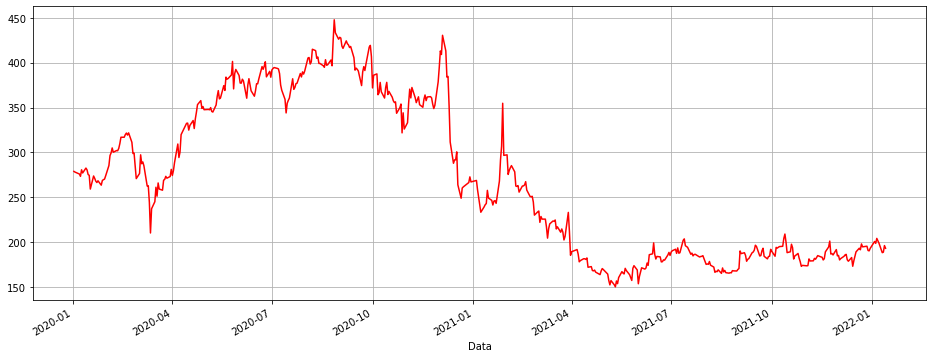

In [59]:
df.Zamkniecie.plot(
    figsize=(16,6), #rozciaga wykres szeregow czasowych 
    grid=True, #dodaje siatke
    color='red' #
)

<AxesSubplot:xlabel='Data'>

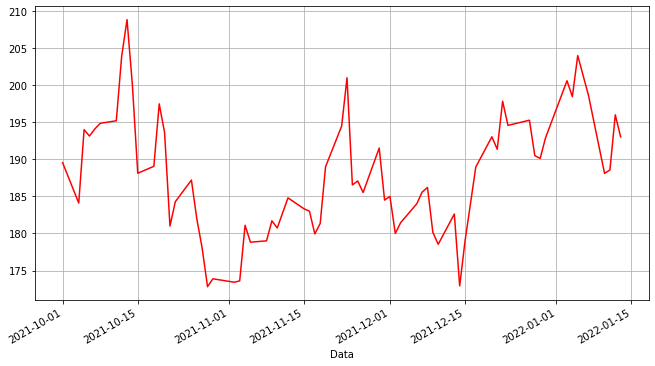

In [64]:
#Zaadanie 
#wziaść dane z wybranego czasookresu 

#Rozwiazanie pobierzemy dane przy uzyciu loc
df.Zamkniecie.loc['2021-10-01':'2022-01-14'].plot(
    figsize=(11,6), #rozciaga wykres szeregow czasowych 
    grid=True, #dodaje siatke
    color='red' #
)

<AxesSubplot:xlabel='Data'>

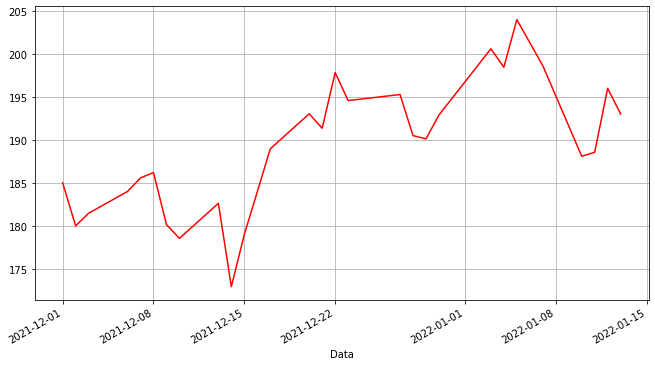

In [65]:
#Zaadanie 
#jak wygladałby wykres na sam grudzień

#Rozwiazanie pobierzemy dane przy uzyciu loc
#Rozwiazanie 1
df.Zamkniecie.loc['2021-12-01':'2022-12-31'].plot(
    figsize=(11,6), #rozciaga wykres szeregow czasowych 
    grid=True, #dodaje siatke
    color='red' #
)

<AxesSubplot:xlabel='Data'>

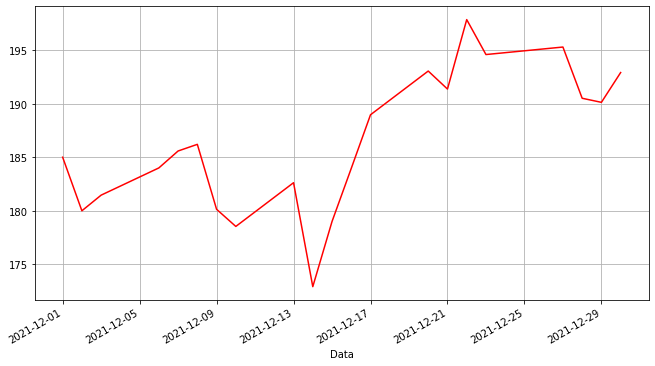

In [66]:
#Rozwiazanie 2
df.Zamkniecie.loc['2021-12'].plot(
    figsize=(11,6), #rozciaga wykres szeregow czasowych 
    grid=True, #dodaje siatke
    color='red' #
)

<AxesSubplot:xlabel='Data'>

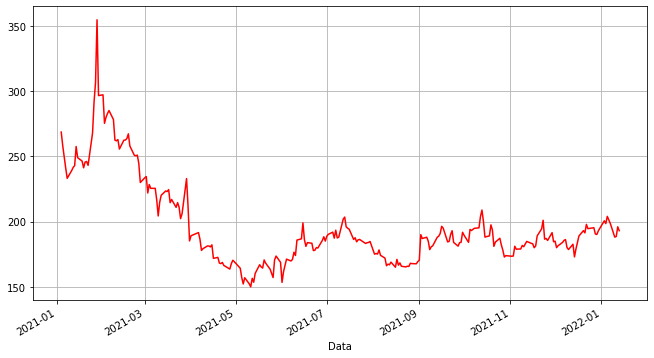

In [76]:
#Zadanie
#pokazać dane od roku 2021
#Rozwiazanie 2
df.Zamkniecie.loc['2021':].plot(
    figsize=(11,6), #rozciaga wykres szeregow czasowych 
    grid=True, #dodaje siatke
    color='red' #
)

#[2021:] <-znaczenie ma :

<AxesSubplot:xlabel='Data'>

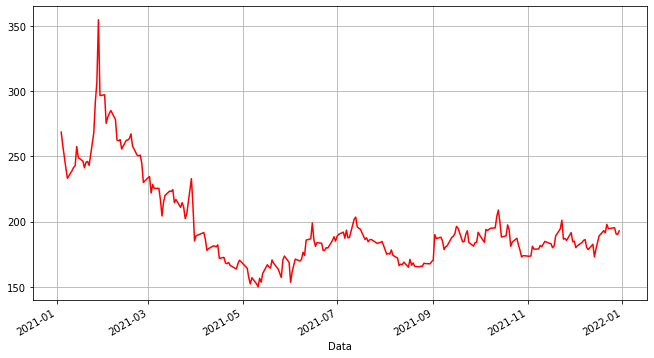

In [100]:
#Zadanie
#pokazać dane na rok 2021

#Rozwiazanie 2
df.Zamkniecie.loc['2021'].plot(
    figsize=(11,6), #rozciaga wykres szeregow czasowych 
    grid=True, #dodaje siatke
    color='red' #
)
#[2021] <-znaczenie przy loc ma 2021

In [86]:
#Zadanie 
#obliczyć średnią roczną w sytuacji gdy mamy w danych obiekt datetime wynik przedstawic na wykresie

#Rozwiazanie
# robie resampling  - trzeba przeprobkowac dane
df.Zamkniecie.resample("A").mean() #A oznacza annual - roczne, 
#mean oblicza srednia #zwracany jest obiekt serii ktory mozna przedstawic na wykresie

Data
2020-12-31    346.568333
2021-12-31    196.479084
2022-12-31    195.922500
Freq: A-DEC, Name: Zamkniecie, dtype: float64

<AxesSubplot:xlabel='Data'>

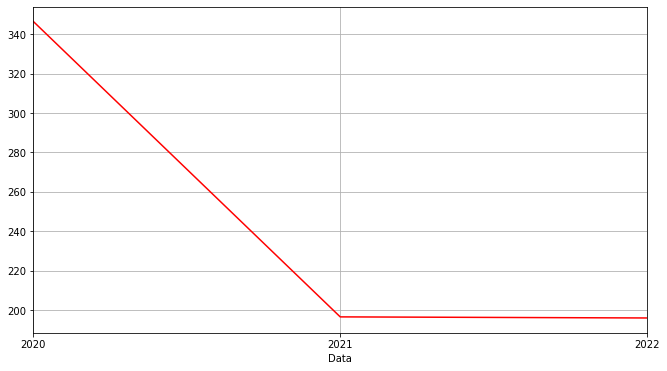

In [87]:
#krok2
df.Zamkniecie.resample("A").mean().plot(
    figsize=(11,6), #rozciaga wykres szeregow czasowych 
    grid=True, #dodaje siatke
    color='red' #
)#wykres jest domyslnie liniowy trzeba zmienic na słupkowy

<AxesSubplot:xlabel='Data'>

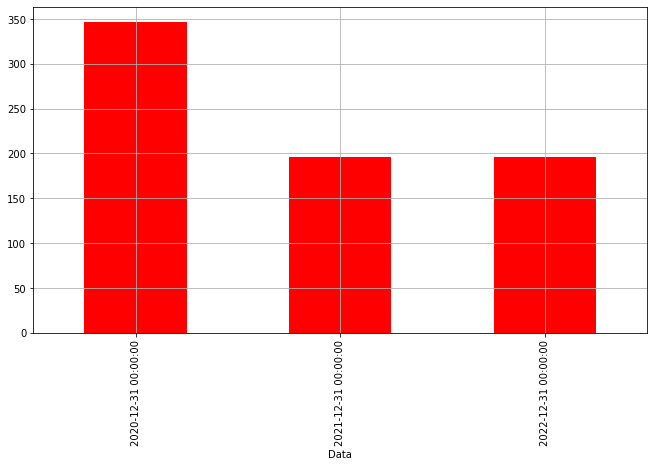

In [88]:
#krok 3 -> zmiana na wykres slupkowy
df.Zamkniecie.resample("A").mean().plot(
    figsize=(11,6), #rozciaga wykres szeregow czasowych 
    grid=True, #dodaje siatke
    color='red', #
    kind='bar'
)

<AxesSubplot:xlabel='Data'>

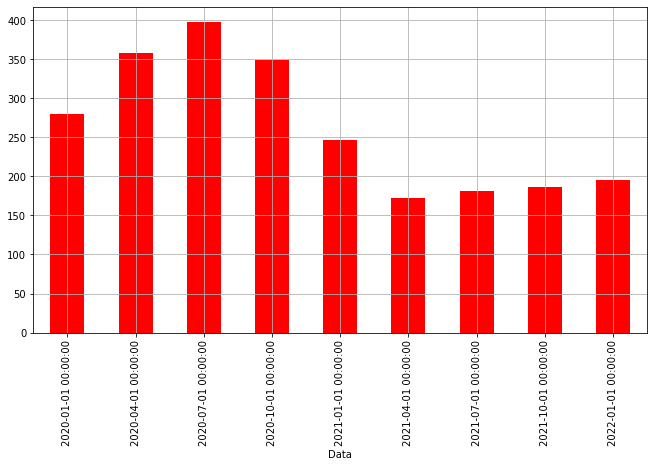

In [94]:
#Zadanie 
#obliczyć średnią kwartalna w sytuacji gdy mamy w danych obiekt datetime wynik przedstawic na wykresie 

#Rozwiazanie - trzeba przeprobkowac dane
df.Zamkniecie.resample("QS").mean().plot( #QS - Q kwartał S - początek kwartału
    figsize=(11,6), #rozciaga wykres szeregow czasowych 
    grid=True, #dodaje siatke
    color='red', #
    kind='bar'
)#wykres jest domyslnie liniowy trzeba zmienic na słupkowy

<AxesSubplot:ylabel='Data'>

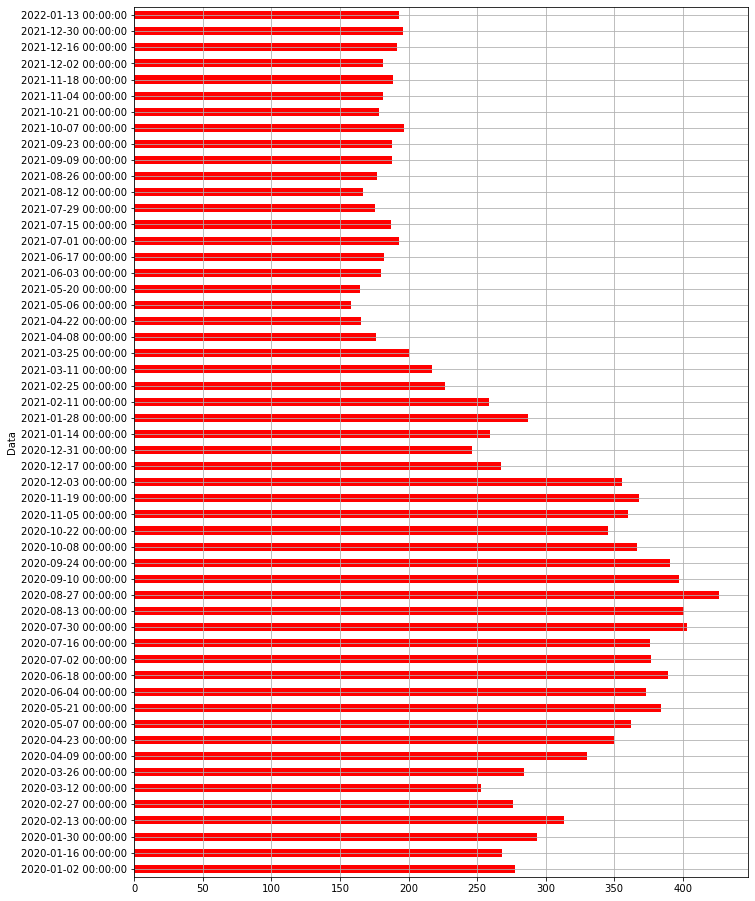

In [99]:
#Zadanie 
#obliczyć średnią 14dniową w sytuacji gdy mamy w danych obiekt datetime wynik przedstawic na wykresie 

#Rozwiazanie
df.Zamkniecie.resample("14D").mean().plot(
    figsize=(11,16), #rozciaga wykres szeregow czasowych 
    grid=True, #dodaje siatke
    color='red', #
    kind='barh' #odwrócenie wykresu przez dodanie literki h
)#wykres jest domyslnie liniowy trzeba zmienic na słupkowy

<AxesSubplot:xlabel='Data'>

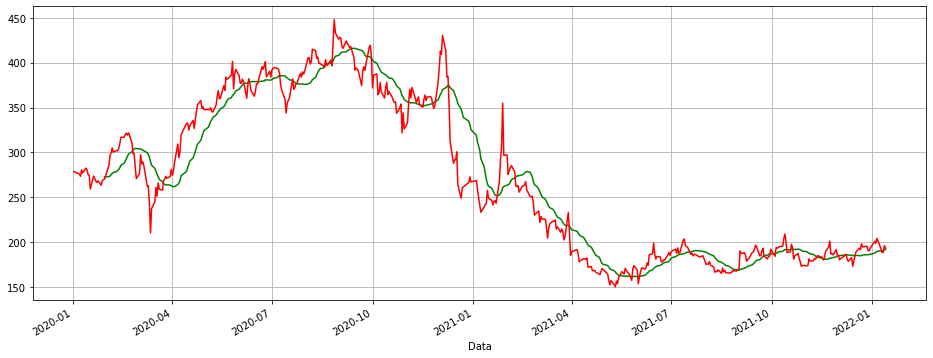

In [115]:
#Zadanie 
#obliczyć średnią kroczącą w sytuacji gdy mamy w danych obiekt datetime wynik przedstawic na wykresie 

#średnia kroczaca bazuje na rolowaniu danych. rolujemy wartosci z tylu przesuwamy sie o n do przodu i 
#znowu rolujemy (okno rolowania) i dalej 
#krok 1 - rolowanie danych do kalkulacji i obliczenie sredniej na obiekcie serii
df.Zamkniecie.rolling(20).mean()
#zeby podejrzeć tabele
df.Zamkniecie.rolling(20).mean().head(20)


#krok 2 - robie wykres
df.Zamkniecie.rolling(20).mean().plot(
    figsize=(16,6), #rozciaga wykres szeregow czasowych 
    grid=True, #dodaje siatke
    color='green',
)

#krok 3 - robie wykres tak zeby były oryginalne dane i dane ze sredniej kroczacej 
df.Zamkniecie.plot(
    figsize=(16,6), #rozciaga wykres szeregow czasowych 
    grid=True, #dodaje siatke
    color='red', 
)
############################## uwaga zeby były dwie linie na 1 wykresie to trzeba w 1 komorce wszystkie dane plotowac 
#(trzeba podac wszystko co ma byc rysowane w komorce)



<AxesSubplot:xlabel='Data'>

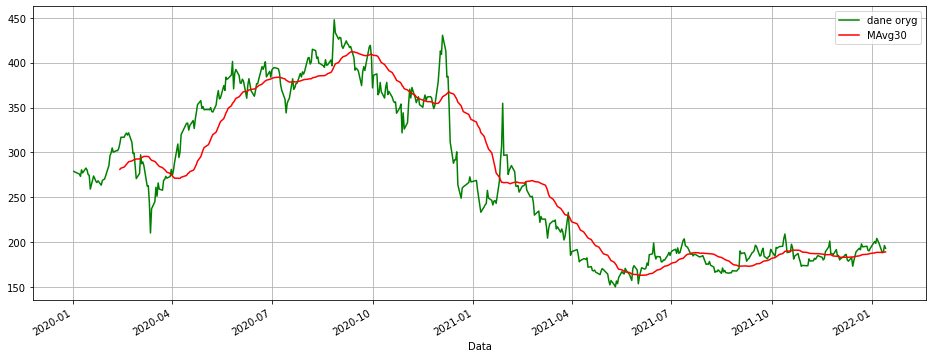

In [126]:
#krok 4 - dodaje legende 
#nazwy elementów legendy pochodza od oznaczenia serii danych wiec jezeli dane maja takie same nazwy kolumn to jest zonk i trzeba 
#zmienac recznie jak ponizej 
#dodaje legend i podaje name
#

line1 = df.Zamkniecie # tutaj tak naprawde jest robiona referencja
line1.name='dane oryg'

line1.plot(
    color='green',
    legend =True
)

line2 = df.Zamkniecie.rolling(30).mean() #<-metoda mean tworzy klona wiec nie ma juz referencji
line2.name = 'MAvg30'
line2.plot(
    figsize=(16,6), #rozciaga wykres szeregow czasowych 
    grid=True, #dodaje siatke
    color='red',
    legend =True
)

<AxesSubplot:xlabel='Data'>

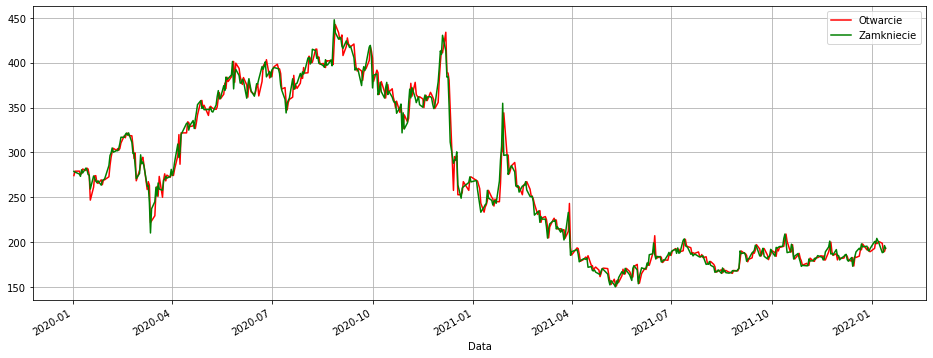

In [143]:
#Zadanie
#pokazać dwie serie danych na jednym wykresie

df[['Otwarcie','Zamkniecie']].plot(
    figsize=(16,6), #rozciaga wykres
    grid=True, #dodaje siatke
    legend =True, #oznaczenie serii na podstawie ich nazwy
    color=['red','green']
)

Index(['Otwarcie', 'Najwyzszy', 'Najnizszy', 'Zamkniecie', 'Wolumen'], dtype='object')


<AxesSubplot:xlabel='Data'>

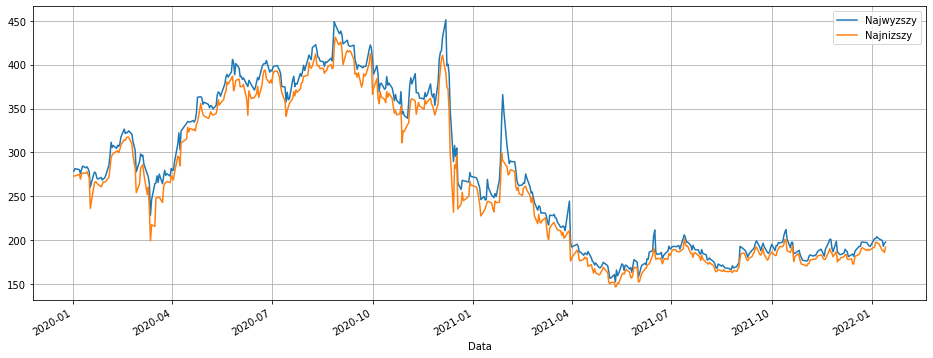

In [144]:
print(df.columns) 

df[['Najwyzszy','Najnizszy']].plot(
    figsize=(16,6), #rozciaga wykres
    grid=True, #dodaje siatke
    legend =True)

#tutaj matplotlib jest wolany wewnetrznie przez biblioteke pandas

In [146]:
# ciekawa technika predykcji cen giełdy któa opiera sie na wstedze boringera i myk polega na tym zeby sporzadzić dwie wstegi 
#- wstege gorna i wstege dolna gdy wykres przebija gorna wstege to jest sygnal zeby sprzedawac
# gdy wstega dolna zostanie przebita to trzeba kupować